In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Gyanesh
# Load the datasets
import pandas as pd

file_name = "/kaggle/input/amazon-us-customer-reviews-dataset/amazon_reviews_us_Electronics_v1_00.tsv"

# Use on_bad_lines parameter to skip problematic rows
df = pd.read_csv(file_name, 
                 sep='\t', 
                 on_bad_lines='skip')



In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091024 entries, 0 to 3091023
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 353.7+ MB


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


In [ ]:
# Load the twitter data

twitter_df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding='latin-1')
twitter_df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [2]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [19]:
# List of keywords related to electronics
electronics_keywords = [
    'phone', 'laptop', 'computer', 'tablet', 'smartphone', 
    'tv', 'television', 'headphone', 'camera', 'console',
    'playstation', 'xbox', 'nintendo', 'apple', 'samsung',
    'dell', 'hp', 'lenovo', 'sony', 'electronic','review','product', 'headphone', 'electronic', 'ipad'
]


In [20]:
# Example: Pre-filter tweets with more than 5 words (optional)
twitter_df = twitter_df[twitter_df['text'].str.split().str.len() > 5]

# Apply filtering in chunks (if dataset is large)
chunk_size = 100000  # Adjust based on memory capacity
filtered_chunks = []

for start in range(0, len(twitter_df), chunk_size):
    chunk = twitter_df.iloc[start:start + chunk_size]
    filtered_chunk = chunk[chunk['text'].str.contains('|'.join(electronics_keywords), case=False, na=False)]
    filtered_chunks.append(filtered_chunk)

# Combine all filtered chunks
filtered_tweets = pd.concat(filtered_chunks, ignore_index=True)
filtered_tweets.head()

,target,id,date,flag,user,text
0,0,1467824199,Mon Apr 06 22:23:15 PDT 2009,NO_QUERY,adri_mane,@Starrbby too bad I won't be around I lost my ...
1,0,1467833672,Mon Apr 06 22:25:44 PDT 2009,NO_QUERY,iv3tte,No picnic my phone smells like citrus.
2,0,1467837602,Mon Apr 06 22:26:45 PDT 2009,NO_QUERY,GetGary,"@paradisej cool, i will. their are all kinds o..."
3,0,1467871661,Mon Apr 06 22:35:41 PDT 2009,NO_QUERY,ciairuhh,"I miss you twitter. My phone broke, now I'm us..."
4,0,1467875163,Mon Apr 06 22:36:38 PDT 2009,NO_QUERY,saraguilford12,"feeling lost, naked and confused (JK, sort of)..."


In [21]:
filtered_tweets.tail()

,target,id,date,flag,user,text
56458,4,2193552007,Tue Jun 16 08:36:44 PDT 2009,NO_QUERY,Bellaleyla,"@Sky_1995 sorryyy. i gotta go now, my mom want..."
56459,4,2193552422,Tue Jun 16 08:36:46 PDT 2009,NO_QUERY,fosking,want FREE Apple products? iPhone 3G S macbook ...
56460,4,2193552895,Tue Jun 16 08:36:49 PDT 2009,NO_QUERY,Laurendaly,"has a day long date with God today, no phones ..."
56461,4,2193554543,Tue Jun 16 08:36:57 PDT 2009,NO_QUERY,Lena_Bjorna,@BizReviewer thanks so much for that acknowled...
56462,4,2193577941,Tue Jun 16 08:38:53 PDT 2009,NO_QUERY,lexi234,got home an hour ago ate lunch watched some tv...


In [22]:
# Convert review_date to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to process a batch of data
def process_batch(batch):
    batch['sentiment_score'] = batch['review_body'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
    return batch

# Process data in chunks
chunk_size = 10000  # Adjust based on memory constraints
chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

processed_chunks = []
for chunk in chunks:
    processed_chunk = process_batch(chunk)
    processed_chunks.append(processed_chunk)

# Combine processed chunks back into a single DataFrame
df = pd.concat(processed_chunks)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/tmp/ipykernel_24/688406253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['sentiment_score'] = batch['review_body'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
/tmp/ipykernel_24/688406253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['sentiment_score'] = batch['review_body'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
/tmp/ipykernel_24/688406253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [26]:
# Group by product_title and month, then calculate average sentiment score
amazon_monthly_sentiment = df.groupby(
    [pd.Grouper(key='review_date', freq='M'), 'product_title']
)['sentiment_score'].mean().reset_index()

print(amazon_monthly_sentiment.head())


/tmp/ipykernel_24/1623818335.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [pd.Grouper(key='review_date', freq='M'), 'product_title']


  review_date                                      product_title  \
0  1999-06-30    Aiwa HSTA483 AM/FM Stereo Radio Cassette Player   
1  1999-06-30                         Diamond Rio Digital Player   
2  1999-06-30             JVC RVB90 Urban Assault Kaboom (Green)   
3  1999-06-30  Sharp CDC472 Pro Logic Home Theater System (Di...   
4  1999-06-30                                 Sony DE441 Discman   

   sentiment_score  
0         0.957000  
1         0.769378  
2         0.936350  
3         0.492600  
4        -0.013100  


In [40]:
# Convert date to datetime format
twitter_df['date'] = pd.to_datetime(twitter_df['date'])
# Apply VADER to calculate sentiment scores for tweet text
def process_sentiment_batch(batch):
    batch['sentiment_score'] = batch['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
    return batch

# Process data in chunks
chunk_size = 100000  # Adjust based on memory constraints
chunks = [filtered_tweets[i:i+chunk_size] for i in range(0, len(twitter_df), chunk_size)]

processed_chunks = []
for chunk in chunks:
    processed_chunk = process_sentiment_batch(chunk)
    processed_chunks.append(processed_chunk)

# Combine processed chunks back into a single DataFrame
twitter_filtered_df = pd.concat(processed_chunks, ignore_index=True)


/tmp/ipykernel_24/1080562679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['sentiment_score'] = batch['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])
/tmp/ipykernel_24/1080562679.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  twitter_filtered_df = pd.concat(processed_chunks, ignore_index=True)


In [42]:
twitter_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56463 entries, 0 to 56462
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           56463 non-null  int64  
 1   id               56463 non-null  int64  
 2   date             56463 non-null  object 
 3   flag             56463 non-null  object 
 4   user             56463 non-null  object 
 5   text             56463 non-null  object 
 6   sentiment_score  56463 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.0+ MB


In [44]:
# Group by month and calculate average sentiment score
twitter_filtered_df['date'] = pd.to_datetime(twitter_filtered_df['date'])
twitter_monthly_sentiment = twitter_filtered_df.groupby(
    pd.Grouper(key='date', freq='M')
)['sentiment_score'].mean().reset_index()

print(twitter_monthly_sentiment.head())


        date  sentiment_score
0 2009-04-30         0.134881
1 2009-05-31         0.158566
2 2009-06-30         0.058128


/tmp/ipykernel_24/4099742817.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='date', freq='M')


In [45]:
# Filter Amazon reviews for the year 2009
amazon_2009 = df[df['review_date'].dt.year == 2009]

# Group both datasets by month
amazon_monthly = amazon_2009.groupby(pd.Grouper(key='review_date', freq='M'))['sentiment_score'].mean().reset_index()
twitter_monthly = twitter_df.groupby(pd.Grouper(key='date', freq='M'))['sentiment_score'].mean().reset_index()


/tmp/ipykernel_24/256725936.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  amazon_monthly = amazon_2009.groupby(pd.Grouper(key='review_date', freq='M'))['sentiment_score'].mean().reset_index()
/tmp/ipykernel_24/256725936.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  twitter_monthly = twitter_df.groupby(pd.Grouper(key='date', freq='M'))['sentiment_score'].mean().reset_index()


In [46]:
# Merge datasets on the time column
merged_data = pd.merge(amazon_monthly, twitter_monthly, left_on='review_date', right_on='date', suffixes=('_amazon', '_twitter'))

# Calculate correlation between sentiment scores
correlation = merged_data[['sentiment_score_amazon', 'sentiment_score_twitter']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                         sentiment_score_amazon  sentiment_score_twitter
sentiment_score_amazon                 1.000000                 0.967801
sentiment_score_twitter                0.967801                 1.000000


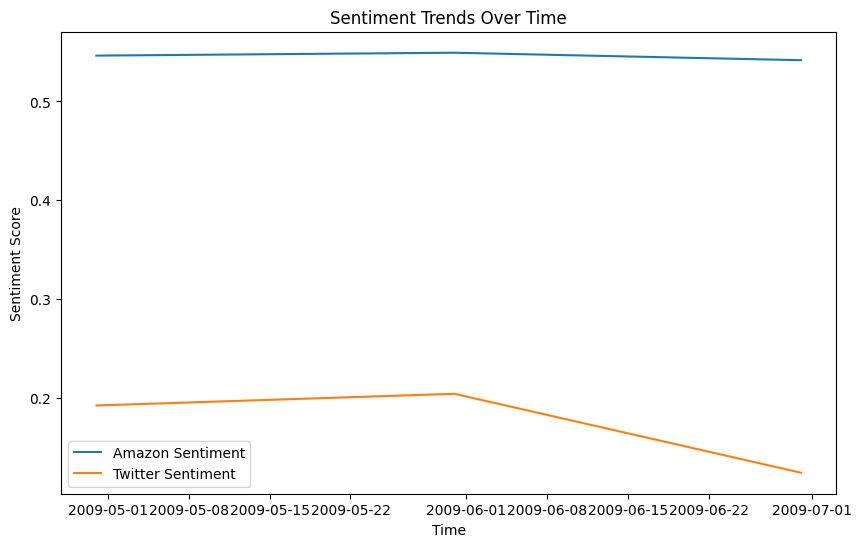

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(merged_data['review_date'], merged_data['sentiment_score_amazon'], label='Amazon Sentiment')
plt.plot(merged_data['date'], merged_data['sentiment_score_twitter'], label='Twitter Sentiment')
plt.legend()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


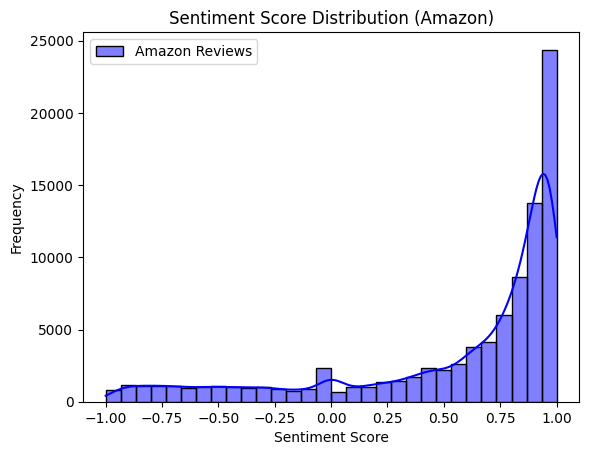

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


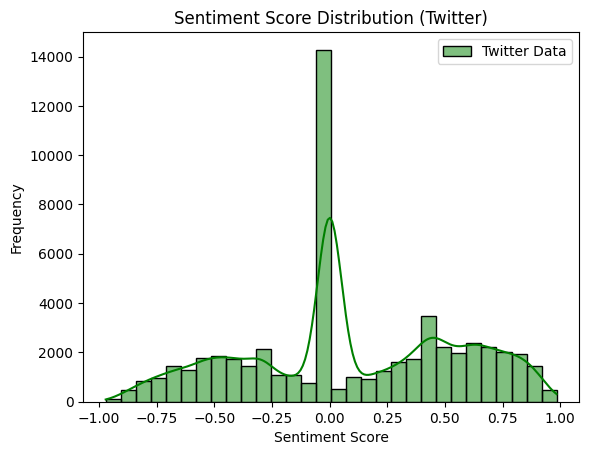

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment score distribution for Amazon reviews
sns.histplot(amazon_2009['sentiment_score'], kde=True, bins=30, color='blue', label='Amazon Reviews')
plt.title('Sentiment Score Distribution (Amazon)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot sentiment score distribution for Twitter data
sns.histplot(twitter_filtered_df['sentiment_score'], kde=True, bins=30, color='green', label='Twitter Data')
plt.title('Sentiment Score Distribution (Twitter)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


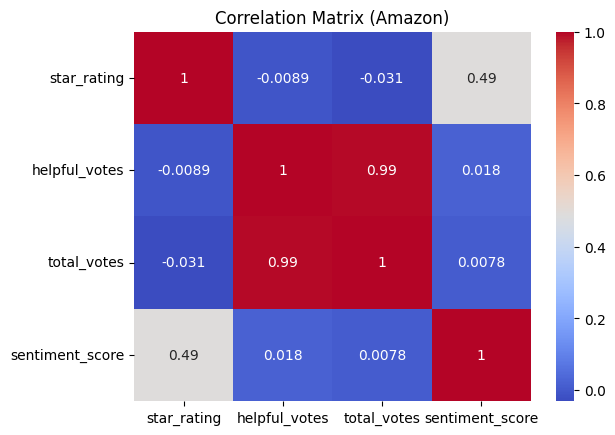

In [49]:
# Correlation heatmap for Amazon dataset
corr_amazon = amazon_2009[['star_rating', 'helpful_votes', 'total_votes', 'sentiment_score']].corr()
sns.heatmap(corr_amazon, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Amazon)')
plt.show()

# Correlation heatmap for Twitter dataset (if engagement metrics are available)
if 'likes' in twitter_df.columns and 'retweets' in twitter_df.columns:
    corr_twitter = twitter_filtered_df[['likes', 'retweets', 'sentiment_score']].corr()
    sns.heatmap(corr_twitter, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix (Twitter)')
    plt.show()


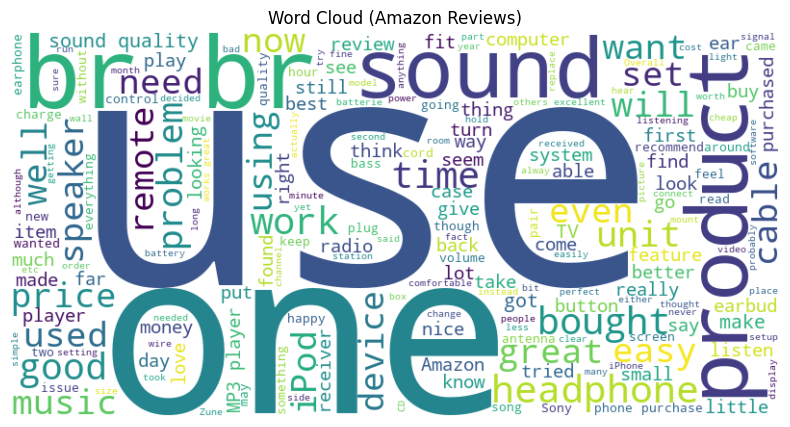

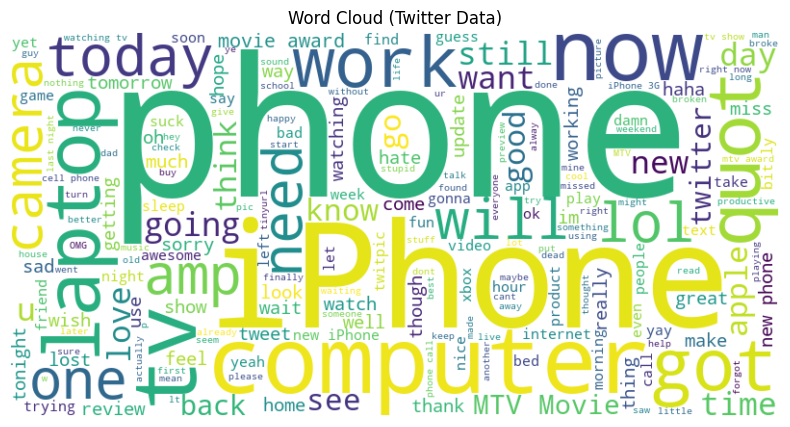

In [50]:
# Filter this based on the company
from wordcloud import WordCloud

# Word cloud for Amazon reviews
text_amazon = ' '.join(amazon_2009['review_body'].dropna())
wordcloud_amazon = WordCloud(width=800, height=400, background_color='white').generate(text_amazon)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_amazon, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Amazon Reviews)')
plt.show()

# Word cloud for Twitter data
text_twitter = ' '.join(twitter_filtered_df['text'].dropna())
wordcloud_twitter = WordCloud(width=800, height=400, background_color='white').generate(text_twitter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_twitter, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Twitter Data)')
plt.show()


In [51]:
keywords = ['price', 'battery', 'design']  # Example keywords

for keyword in keywords:
    amazon_keyword_sentiment = amazon_2009[amazon_2009['review_body'].str.contains(keyword, case=False, na=False)]['sentiment_score'].mean()
    twitter_keyword_sentiment = twitter_filtered_df[twitter_filtered_df['text'].str.contains(keyword, case=False, na=False)]['sentiment_score'].mean()
    print(f"Keyword: {keyword}")
    print(f"  Amazon Avg Sentiment: {amazon_keyword_sentiment}")
    print(f"  Twitter Avg Sentiment: {twitter_keyword_sentiment}")


Keyword: price
  Amazon Avg Sentiment: 0.7045531341943848
  Twitter Avg Sentiment: 0.16046521739130437
Keyword: battery
  Amazon Avg Sentiment: 0.5699043013899049
  Twitter Avg Sentiment: -0.16555766016713092
Keyword: design
  Amazon Avg Sentiment: 0.6442054277828888
  Twitter Avg Sentiment: 0.21439605263157896


In [53]:
def analyze_company_sentiment(company_name, amazon_df, twitter_df):
    """
    Analyze sentiments and trends for a specific company across Amazon reviews and Twitter data.

    Parameters:
    - company_name (str): The name of the company to filter (e.g., "Apple").
    - amazon_df (DataFrame): Amazon reviews dataset.
    - twitter_df (DataFrame): Twitter dataset.

    Returns:
    - None: Displays visualizations and prints insights.
    """
    
    # Filter Amazon dataset for the company
    amazon_filtered = amazon_df[amazon_df['product_title'].str.contains(company_name, case=False, na=False)]
    
    # Filter Twitter dataset for the company
    twitter_filtered = twitter_df[twitter_df['text'].str.contains(company_name, case=False, na=False)]
    
    if amazon_filtered.empty or twitter_filtered.empty:
        print(f"No data found for {company_name} in one or both datasets.")
        return
    
    # Group Amazon data by month
    amazon_monthly = amazon_filtered.groupby(
        pd.Grouper(key='review_date', freq='M')
    )['sentiment_score'].mean().reset_index()
    
    # Group Twitter data by month
    twitter_monthly = twitter_filtered.groupby(
        pd.Grouper(key='date', freq='M')
    )['sentiment_score'].mean().reset_index()
    
    # Plot sentiment trends over time
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(data=amazon_monthly, x='review_date', y='sentiment_score', label='Amazon Sentiment', color='blue')
    sns.lineplot(data=twitter_monthly, x='date', y='sentiment_score', label='Twitter Sentiment', color='green')
    
    plt.title(f'Sentiment Trends for {company_name}')
    plt.xlabel('Time')
    plt.ylabel('Average Sentiment Score')
    plt.legend()
    plt.show()
    
    # Sentiment distribution comparison
    plt.figure(figsize=(12, 6))
    
    sns.histplot(amazon_filtered['sentiment_score'], kde=True, bins=30, color='blue', label='Amazon Sentiment')
    sns.histplot(twitter_filtered['sentiment_score'], kde=True, bins=30, color='green', label='Twitter Sentiment')
    
    plt.title(f'Sentiment Distribution for {company_name}')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    # Print basic statistics
    print(f"Amazon Sentiments for {company_name}:")
    print(amazon_filtered['sentiment_score'].describe())
    
    print(f"\nTwitter Sentiments for {company_name}:")
    print(twitter_filtered['sentiment_score'].describe())


In [73]:
def filter_amazon_by_months(amazon_df, months):
    """
    Filters the Amazon dataset to include only rows where the review date is in the specified months.

    Parameters:
    - amazon_df (DataFrame): The Amazon reviews dataset.
    - months (list): List of month numbers (e.g., [5, 6, 7] for May, June, July).

    Returns:
    - DataFrame: Filtered Amazon dataset.
    """
    # Ensure the review_date column is in datetime format
    amazon_df['review_date'] = pd.to_datetime(amazon_df['review_date'], errors='coerce')
    
    # Filter rows where the month of the review date is in the specified months
    filtered_amazon = amazon_df[amazon_df['review_date'].dt.month.isin(months)]
    
    return filtered_amazon

# Example usage
months_to_filter = [4,5,6]  # May, June, July
filtered_amazon_df = filter_amazon_by_months(amazon_2009, months_to_filter)

# Display the filtered data
print(filtered_amazon_df.head())


        marketplace  customer_id       review_id  product_id  product_parent  \
2821779          US     31229092  R3KMMZWJY7A07X  B0014II9F0       992274286   
2821780          US     15139893  R118E4A1QDIY04  B00067OF80        12310937   
2821781          US     13858174   RXGYF0C4KQH5E  B001D20KUE       344498635   
2821782          US     17907300  R3LPHOSZEOD16Y  B000GIT002        89480199   
2821783          US     50929735  R18WX36A2QWJHN  B0012YFY54       906275872   

                                             product_title product_category  \
2821779  Panasonic RP-HC55-S Noise-Cancelling Earbud He...      Electronics   
2821780  Sennheiser EH-150 Dynamic Sound Evolution Hi-F...      Electronics   
2821781              Creative Zen Mozaic Series MP3 Player      Electronics   
2821782  Eagle Aspen EASDTV2BUHF Directv Approved 2-Bay...      Electronics   
2821783        Sangean Digital Rechargeable Portable Radio      Electronics   

         star_rating  helpful_votes  total_v

/tmp/ipykernel_24/2796228630.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_df['review_date'] = pd.to_datetime(amazon_df['review_date'], errors='coerce')


/tmp/ipykernel_24/1849804782.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='review_date', freq='M')
/tmp/ipykernel_24/1849804782.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.Grouper(key='date', freq='M')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

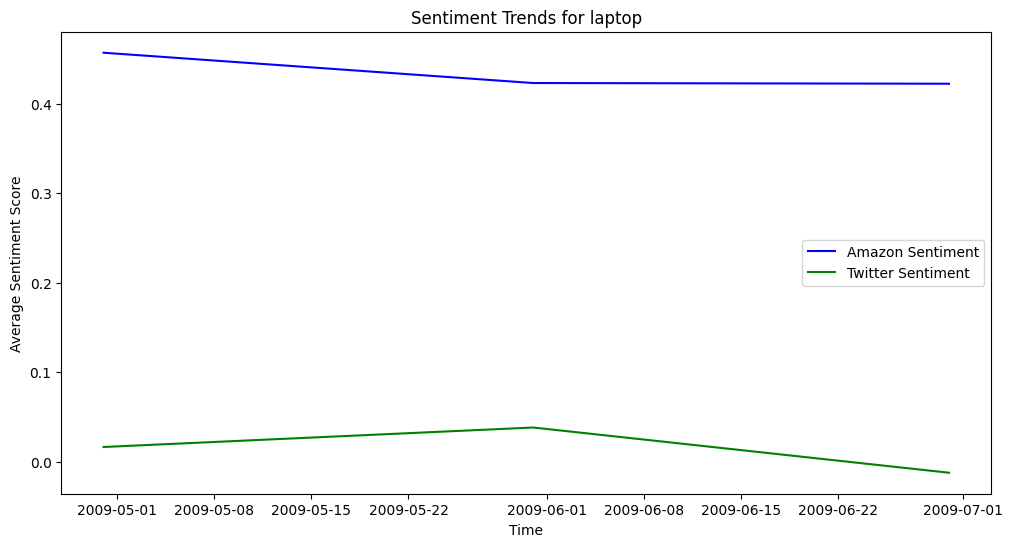

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


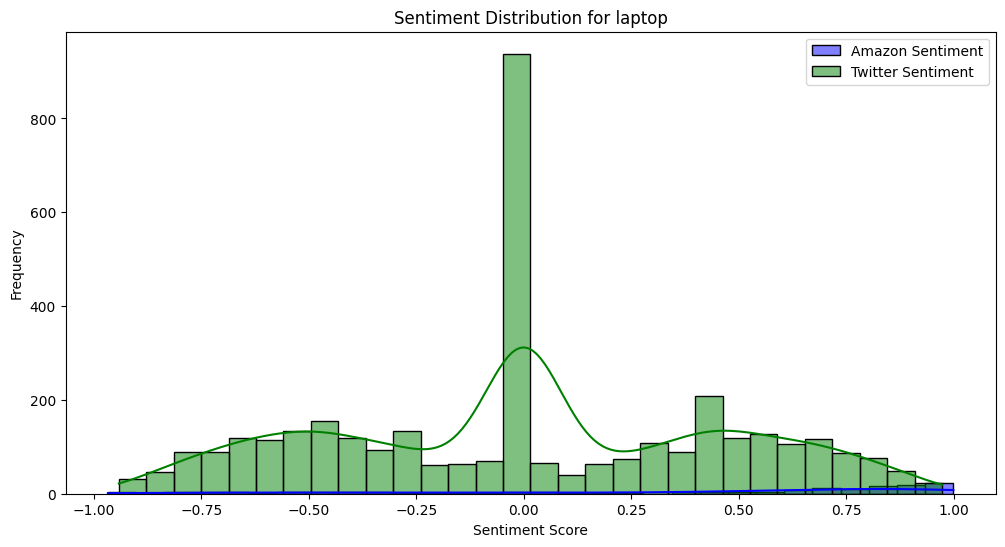

Amazon Sentiments for laptop:
count    148.000000
mean       0.434097
std        0.585145
min       -0.967400
25%        0.045375
50%        0.700300
75%        0.872150
max        0.998700
Name: sentiment_score, dtype: float64

Twitter Sentiments for laptop:
count    3613.000000
mean        0.005237
std         0.457347
min        -0.942000
25%        -0.361200
50%         0.000000
75%         0.401900
max         0.972400
Name: sentiment_score, dtype: float64


In [83]:
# Example usage
analyze_company_sentiment("laptop", filtered_amazon_df, twitter_filtered_df)


In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_sentiment_trends(company_name, amazon_df, twitter_df):
    """
    Analyze sentiment trends for a specific company across Amazon reviews and Twitter data.

    Parameters:
    - company_name (str): The name of the company to filter (e.g., "Apple").
    - amazon_df (DataFrame): The Amazon reviews dataset.
    - twitter_df (DataFrame): The Twitter dataset.

    Returns:
    - None: Displays visualizations and prints insights.
    """
    
    # Filter Amazon dataset for the company
    amazon_filtered = amazon_df[amazon_df['product_title'].str.contains(company_name, case=False, na=False)]
    
    # Filter Twitter dataset for the company
    twitter_filtered = twitter_df[twitter_df['text'].str.contains(company_name, case=False, na=False)]
    
    if amazon_filtered.empty or twitter_filtered.empty:
        print(f"No data found for {company_name} in one or both datasets.")
        return
    
    # Group Amazon data by month
    amazon_monthly = amazon_filtered.groupby(
        pd.Grouper(key='review_date', freq='ME')
    )['sentiment_score'].mean().reset_index()
    
    # Group Twitter data by month
    twitter_monthly = twitter_filtered.groupby(
        pd.Grouper(key='date', freq='ME')
    )['sentiment_score'].mean().reset_index()
    
    # Normalize sentiment scores to make trends comparable
    amazon_monthly['normalized_sentiment'] = (amazon_monthly['sentiment_score'] - amazon_monthly['sentiment_score'].mean()) / amazon_monthly['sentiment_score'].std()
    twitter_monthly['normalized_sentiment'] = (twitter_monthly['sentiment_score'] - twitter_monthly['sentiment_score'].mean()) / twitter_monthly['sentiment_score'].std()
    
    # Plot normalized sentiment trends over time
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(data=amazon_monthly, x='review_date', y='normalized_sentiment', label='Amazon Sentiment (Normalized)', color='blue')
    sns.lineplot(data=twitter_monthly, x='date', y='normalized_sentiment', label='Twitter Sentiment (Normalized)', color='green')
    
    plt.title(f'Sentiment Trends for {company_name}')
    plt.xlabel('Time')
    plt.ylabel('Normalized Sentiment Score')
    plt.legend()
    plt.show()
    
    # Print basic statistics for each platform
    print(f"Amazon Sentiments for {company_name}:")
    print(amazon_filtered['sentiment_score'].describe())
    
    print(f"\nTwitter Sentiments for {company_name}:")
    print(twitter_filtered['sentiment_score'].describe())


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

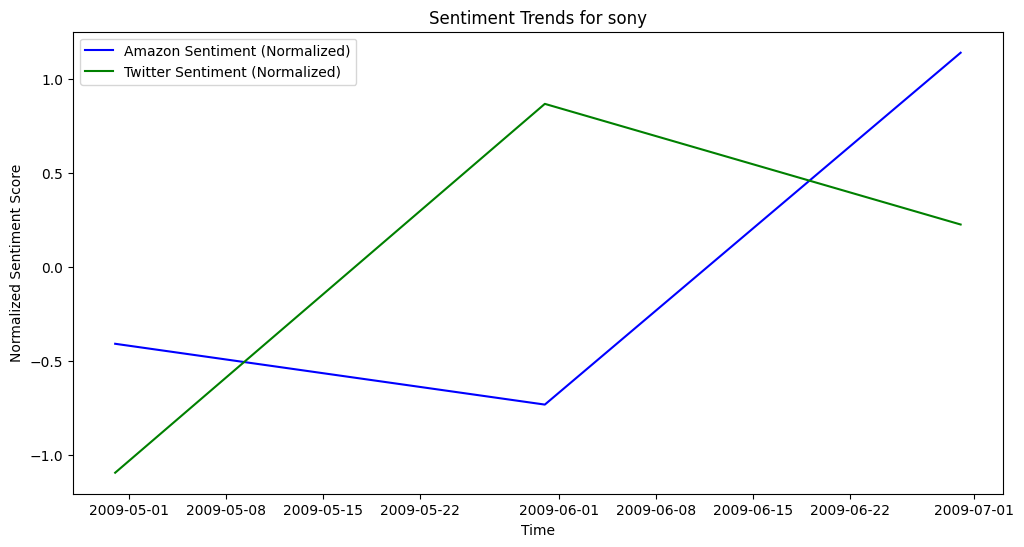

Amazon Sentiments for sony:
count    1794.000000
mean        0.565018
std         0.543571
min        -0.998400
25%         0.401900
50%         0.831600
75%         0.942175
max         0.999600
Name: sentiment_score, dtype: float64

Twitter Sentiments for sony:
count    459.000000
mean       0.106952
std        0.455723
min       -0.897900
25%       -0.175900
50%        0.000000
75%        0.492600
max        0.951400
Name: sentiment_score, dtype: float64


In [116]:
analyze_sentiment_trends("sony", filtered_amazon_df, twitter_filtered_df)

In [100]:
!pip install ipywidgets


In [106]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [118]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_company_dropdown(filtered_amazon_df, twitter_filtered_df):
    companies = ["Sony", "Apple", "Microsoft", "Google", "Amazon", "Samsung"]
    
    output = widgets.Output()
    
    def on_company_select(change):
        with output:
            clear_output(wait=True)
            analyze_sentiment_trends(change.new, filtered_amazon_df, twitter_filtered_df)
    
    company_dropdown = widgets.Dropdown(
        options=companies,
        value=companies[0],  # Set default value
        description='Company:',
        style={'description_width': 'initial'}
    )
    
    company_dropdown.observe(on_company_select, names='value')
    
    # Display both the dropdown and output area
    display(company_dropdown, output)
    
    # Initial plot
    with output:
        analyze_sentiment_trends(companies[0], filtered_amazon_df, twitter_filtered_df)


In [119]:
create_company_dropdown(filtered_amazon_df, twitter_filtered_df)


Dropdown(description='Company:', options=('Sony', 'Apple', 'Microsoft', 'Google', 'Amazon', 'Samsung'), style=…

Output()

In [120]:
# Show trends for ratings based on the company from the whole amazon dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091024 entries, 0 to 3091023
Data columns (total 16 columns):
 #   Column             Dtype         
---  ------             -----         
 0   marketplace        object        
 1   customer_id        int64         
 2   review_id          object        
 3   product_id         object        
 4   product_parent     int64         
 5   product_title      object        
 6   product_category   object        
 7   star_rating        int64         
 8   helpful_votes      int64         
 9   total_votes        int64         
 10  vine               object        
 11  verified_purchase  object        
 12  review_headline    object        
 13  review_body        object        
 14  review_date        datetime64[ns]
 15  sentiment_score    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(9)
memory usage: 377.3+ MB


In [ ]:
# Show trends for sentiments based on the company from the whole amazon dataset

In [ ]:
# Create a model to predict the average rating for the whole month based on the previous data